# Examen

#### Instrucciones

- Crea en tu carpeta, un archivo llamado `examen` y pega el texto de las problemas en él (respeta el formato).

- Contesta inmediatamente abajo del problema.

- Gráficas en calidad profesional (pon ejes, unidades, colores, leyenda, etc.)

- La ortografía, redacción y habilidades de comunicación se tomarán en cuenta.

### Problema 1

(a) Usando `Simpy`, declara las funciones:
$$
y(x) = \sin(x)
$$

$$
z(x) = \cos(x)
$$

$$
w(x) = \frac{1}{\cos(x) + \sin(2x)}
$$

(b) Obtén la derivada de $g(x)$

$$
g(x) = y(x)*z(x)
$$

(c) Grafica $w(x)$ en el rango $[0,1]$

(d) Integra de manera indefinida $w(x)$ y luego evalúala desde $0$ a $1$.

(e) ¿Cuál es el límite de $y(x), z(x), g(x)$ y $w(x)$ cuando $x \to 0$.?

(f) Expanda $y(x)$ y $z(x)$ hasta 3 orden en serie de Taylor.

(a) Usando `Simpy`, declara las funciones:
$$
y(x) = \sin(x)
$$

$$
z(x) = \cos(x)
$$

$$
w(x) = \frac{1}{\cos(x) + \sin(2x)}
$$

In [1]:
#A) Definimos las funciones con la ayuda sympy
from sympy import *
import numpy as np
import math
x=Symbol('x')
y=Function('y')(x)
z=Function('z')(x)
w=Function('w')(x)


y=sin(x)
z=cos(x)
w=1/(cos(x)+sin(2*x))
print('y(x)=',y)
print('z(x)=',z)
print('w(x)=',w)

y(x)= sin(x)
z(x)= cos(x)
w(x)= 1/(sin(2*x) + cos(x))


(b) Obtén la derivada de $g(x)$

$$
g(x) = y(x)*z(x)
$$

In [2]:
#B) Aplicamos la derivada
g=y*z
Derivada=diff(g,x)
print(Derivada)

-sin(x)**2 + cos(x)**2


(c) Grafica $w(x)$ en el rango $[0,1]$

Text(0.5, 0, 'X')

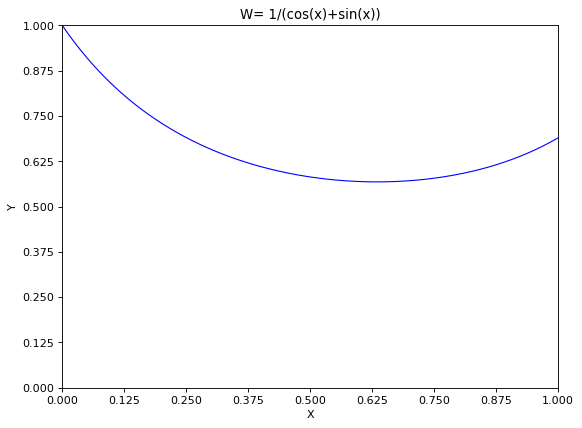

In [3]:
#C)
t = np.linspace(0, 1, 256, endpoint=True)
W= 1/(np.cos(t)+np.sin(2*t))

import matplotlib.pyplot as plt
# Se crea la figura
plt.figure(figsize=(8, 6), dpi=80)
# Dibuja el w en azul, con una línea contínua.
plt.plot(t, W, color="blue", linewidth=1.0, linestyle="-")
# Los límites de x
plt.xlim(0, 1)
# Se ponen 10 marcas en el eje x
plt.xticks(np.linspace(0, 1, 9, endpoint=True))
# igual en y
plt.ylim(0, 1.0)
plt.yticks(np.linspace(0,1,9, endpoint=True))
#Se pone título
plt.title('W= 1/(cos(x)+sin(x))')
plt.ylabel('Y',fontsize=10)
plt.xlabel('X',fontsize=10)

(d) Integra de manera indefinida $w(x)$ y luego evalúala desde $0$ a $1$.

Integraremos también g por instrucción del profesor

In [4]:
#D) Aplicamos integracion indefinida y luego evaluamos
integrate(w, x)

Integral(1/(sin(2*x) + cos(x)), x)

In [5]:
#D) Apliacmos integración definida
integrate(w, (x, 0, 1))

Integral(1/(sin(2*x) + cos(x)), (x, 0, 1))

In [6]:
#D) Aplicamos integracion indefinida y luego evaluamos
integrate(g, x)

sin(x)**2/2

In [7]:
#D) Apliacmos integración definida
integrate(g, (x, 0, 1))

sin(1)**2/2

(e) ¿Cuál es el límite de $y(x), z(x), g(x)$ y $w(x)$ cuando $x \to 0$.?

In [8]:
#E) Buscamos el límite de y cuando x tiende a 0
limit(y,x,0)

0

In [9]:
#E) Buscamos el límite de z cuando x tiende a 0
limit(z,x,0)

1

In [10]:
#E) Buscamos el límite de g cuando x tiende a 0
limit(g,x,0)

0

In [11]:
#E) Buscamos el límite de w cuando x tiende a 0
limit(w,x,0)

1

(f) Expanda $y(x)$ y $z(x)$ hasta 3 orden en serie de Taylor.

In [12]:
#Sacamos la serie de Taylor de orden 3 de y
#Por default la instrucción series es de orden 3
Eq(y,y.series(x))

Eq(sin(x), x - x**3/6 + x**5/120 + O(x**6))

In [13]:
#Sacamos la serie de Taylor de orden 3 de z
#Por default la instrucción series es de orden 3
Eq(z,z.series(x))

Eq(cos(x), 1 - x**2/2 + x**4/24 + O(x**6))

<div class="alert alert-info">
**NOTA** Muestra las expresiones en cada inciso.
</div>

### Problema 2

El [**atractor de Rössler**](http://en.wikipedia.org/wiki/R%C3%B6ssler_attractor) esta descrito por el siguiente conjunto de ecuaciones:

$$
\frac{dx}{dt} = -y -z
$$

$$
\frac{dy}{dt} = x + ay
$$

$$
\frac{dz}{dt} = b + z(x-c)
$$

(a) Resuelva las ecuaciones numéricamente para 

$$
a=0.13 \quad b=0.2 \quad c=6.5 
$$

y condiciones iniciales

$$
x(0)=0 \quad y(0)=0 \quad z(0)=0 
$$

use el método de Runge-Kutta de 2do orden.

In [14]:
#Definimos el método de Runge_Kutta
def RK2(y, t, dt, derivadas):
    k0 = dt*derivadas(y, t)
    k1 = dt*derivadas(y + k0, t + dt)
    y_next = y + 0.5*(k0 + k1)
    
    return y_next

In [15]:
#Iteraciones
N=1000

#Constantes
a=.13
b=.2
c=6.5

#Valores Iniciales
A = np.zeros([N,3])
A[0,0] = 0
A[0,1] = 0
A[0,2] = 0

tau = 100 # tiempo de la simulación
dt = tau/(float)(N-1)  # tamaño del paso

tiempo = np.linspace(0,tau,N)

In [16]:
#Escribimos el sistema

def Sistema(estado, tiempo):
    g0 = -estado[1]-estado[2]

    g1 = estado[0]+a*estado[1]

    g2 = b + estado[2]*(estado[0]-c)

    return np.array([g0,g1,g2])


In [17]:
#Definimos el método con Runge_Kutta
def Sistema_Runge_Kutta(A, tiempo, dt):

    for j in range(N-1):
        A[j+1] = RK2(A[j], tiempo[j], dt, Sistema)

        
    x = np.array([A[j,0] for j in range(N)])
    y = np.array([A[j,1] for j in range(N)])
    z = np.array([A[j,2] for j in range(N)])
    
    return x, y, z 

In [18]:
#Obtenemos las soluciones
x,y,z = Sistema_Runge_Kutta(A, tiempo, dt)


(b) Muestra en una gráfica el comportamiento de las soluciones en el tiempo (i.e. grafica $x(t)$, $y(t)$ y $z(t)$).

Text(0.5, 1.0, 'X a lo largo del tiempo')

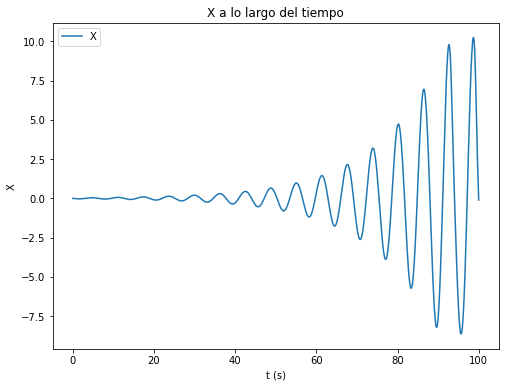

In [19]:
#Graficamos x
plt.figure(1, figsize=(8,6))
plt.plot(tiempo, x, label="X")
plt.xlabel(r"t (s)")
plt.ylabel(r"X")
plt.legend(loc="best")
plt.title('X a lo largo del tiempo')

Text(0.5, 1.0, 'Y a lo largo del tiempo')

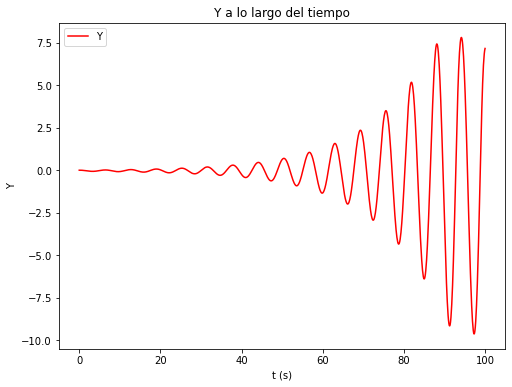

In [20]:
#Graficamos y
plt.figure(1, figsize=(8,6))
plt.plot(tiempo, y, label="Y", c='r')
plt.xlabel(r"t (s)")
plt.ylabel(r"Y")
plt.legend(loc="best")
plt.title('Y a lo largo del tiempo')

Text(0.5, 1.0, 'Z a lo largo del tiempo')

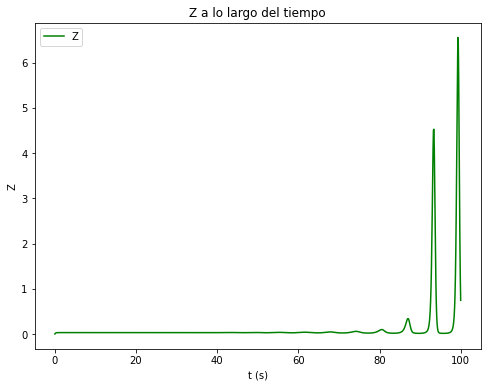

In [21]:
#Graficamos z
plt.figure(1, figsize=(8,6))
plt.plot(tiempo, z, label="Z", c='g')
plt.xlabel(r"t (s)")
plt.ylabel(r"Z")
plt.legend(loc="best")
plt.title('Z a lo largo del tiempo')

Text(0.5, 1.0, 'X,Y,Z a lo largo del tiempo')

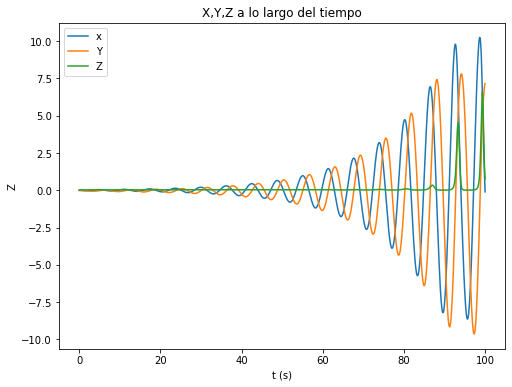

In [22]:
#Graficamos todas juntas
plt.figure(1, figsize=(8,6))
plt.plot(tiempo, x, label="x")
plt.plot(tiempo, y, label="Y")
plt.plot(tiempo, z, label="Z")
plt.xlabel(r"t (s)")
plt.ylabel(r"Z")
plt.legend(loc="best")
plt.title('X,Y,Z a lo largo del tiempo')

(c) Muestra como se ve el **atractor de Rössler** en 3D (i.e. en el espacio).

Text(0.5, 0.92, 'Atractor de Rossler 3D')

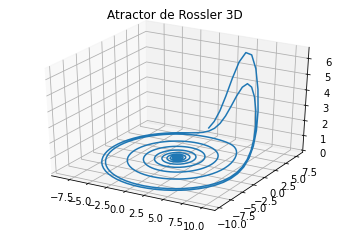

In [23]:
graf=plt.figure()
a=graf.add_subplot(1,1,1, projection='3d')
a.plot(x,y,z)
a.set_title('Atractor de Rossler 3D')

In [24]:
#SIUUUUUUUUUUUU